In [5]:
from edahelper import *
wsb = pd.read_pickle('../Data/subreddit_WallStreetBets/otherdata/wsb_cleaned.pkl')


## Score / ups
The number of upvotes

### The preponderance of ignored submissions

One of the first things that is noticeable is that the vast majority of posts have only a handful of upvotes.

See for instance the frequency at which different upvote values occur:

In [8]:
wsb.ups.value_counts().head(20)/len(wsb)

1     0.758082
0     0.043643
2     0.043257
3     0.017425
4     0.009767
5     0.009049
6     0.007795
7     0.006791
8     0.005979
9     0.005154
10    0.004537
11    0.004180
12    0.003658
13    0.003422
14    0.002989
15    0.002773
16    0.002467
17    0.002246
18    0.002111
19    0.001927
Name: ups, dtype: float64

<AxesSubplot:>

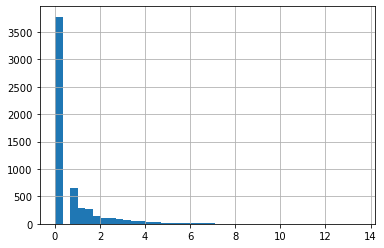

In [30]:
wsb.ups.value_counts().apply( lambda x : np.log(x)).hist(bins = 40)

0.7174753637609433


<AxesSubplot:ylabel='Frequency'>

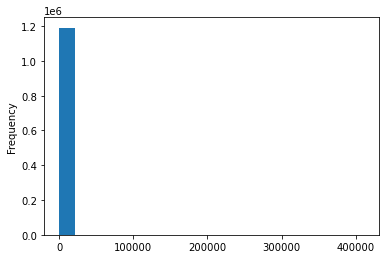

In [16]:
wsb['log_ups'] = wsb.ups.apply(lambda x : np.log(x))
print(len(wsb[wsb.ups == 1])/len(wsb))
wsb[wsb.log_ups >= 0].ups.plot(kind = 'hist', bins = 20)

## Upvote ratio

Because most of the posts linger around 1 vote, and presumably never get seen, for upvote ratios less than one to become common you have to filter out the never seen posts.

Additionally, posts with upvote_ratio < .8 are very rare even after having filtered out the ignored posts.

<AxesSubplot:ylabel='Frequency'>

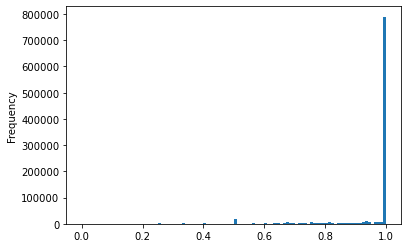

In [11]:
wsb['upvote_ratio'].plot( kind = 'hist', bins = 100)


<AxesSubplot:ylabel='Frequency'>

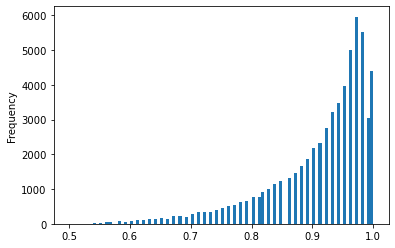

In [13]:
wsb[wsb['ups'] >= 20]['upvote_ratio'].plot( kind = 'hist', bins = 100)
# This distribution roughly makes sense... since heavily downvoted posts don't get seen.

<AxesSubplot:ylabel='Frequency'>

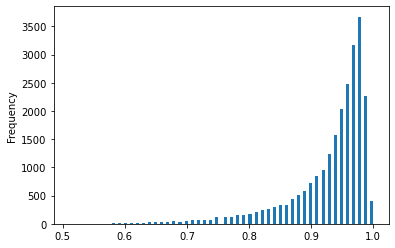

In [12]:
wsb[wsb['ups'] >= 100]['upvote_ratio'].plot( kind = 'hist', bins = 100)
# This distribution roughly makes sense... since heavily downvoted posts don't get seen.

## Authors

Which authors are the most popular? 
Are there authors that are consistently popular? Or do highly upvoted posts tend to be someones 15 minutes of fame?

In [22]:
total_upvotes = wsb[['author', 'ups']].groupby("author").agg("sum").sort_values(by = 'ups', ascending = False)
total_upvotes.head(10)

,ups
author,
None,8718074
DeepFuckingValue,1551072
OPINION_IS_UNPOPULAR,1258349
keenfeed,1051350
game_stone,743846
dhiral1994,517203
SomeGuyInDeutschland,411137
MIA4real,371842
jordanpeterson9,348100


In [27]:
median_upvotes = wsb[['author', 'ups']].groupby("author").agg(["median", "count"]).sort_values(by = ('ups', 'median'), ascending = False)

In [36]:
median_upvotes.head(10)

ups      
                        median count
author                              
SomeGuyInDeutschland  411137.0     1
mpwrd                 210591.0     1
84935                 209354.0     1
kampingcarl           162833.0     1
CockInAClock          140996.0     1
Bundaga               139455.0     1
liftingtailsofcats    137862.0     1
jeepers_sheepers      126138.0     1
LilHMoney             123084.0     1
yellow_duck12         120417.0     1

I thought SomeGuyInDeutschland had more popular posts than this? (Seems like he did, but before the new year: https://www.reddit.com/user/SomeGuyInDeutschland/posts/ )

In [35]:
author_popularity = wsb[["author", "ups"]].groupby("author").agg(["sum", "count", "mean", 'median'])
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(10)
# A lot of the popular posts are one hit wonders...

ups                          
                         sum count      mean    median
author                                                
SomeGuyInDeutschland  411137     1  411137.0  411137.0
mpwrd                 210591     1  210591.0  210591.0
84935                 209354     1  209354.0  209354.0
kampingcarl           162833     1  162833.0  162833.0
CockInAClock          140996     1  140996.0  140996.0
Bundaga               139455     1  139455.0  139455.0
liftingtailsofcats    137862     1  137862.0  137862.0
jeepers_sheepers      126138     1  126138.0  126138.0
LilHMoney             123084     1  123084.0  123084.0
yellow_duck12         120417     1  120417.0  120417.0

In [34]:
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(200).sort_values(by = ("ups", "count"), ascending = False).head(10)

ups                              
                          sum count           mean   median
author                                                     
keenfeed              1051350    26   40436.538462   6302.0
game_stone             743846    16   46490.375000   1418.0
DeepFuckingValue      1551072    14  110790.857143  87935.0
bawse1                 286204     7   40886.285714  33078.0
zachp004               253434     5   50686.800000  26280.0
punkmaster69           164777     4   41194.250000  48778.5
Fargraven              172713     4   43178.250000  21272.5
shhaayy                212009     4   53002.250000   8476.5
IDoLikeMyShishkebabs   221828     4   55457.000000  22353.0
waaaaaaaaaaaaaaahhhh   148654     4   37163.500000    387.0